In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import sklearn


# Basic Implementation of different categorize of machine learning

**Supervised learning:** Models that can predict labels based on labeled training data <br>
**Classification:** Models that predict labels as two or more discrete categories <br>
**Regression:** Models that predict continuous labels <br>
**Unsupervised learning:** Models that identify structure in unlabeled data <br>
**Clustering:** Models that detect and identify distinct groups in the data <br>
**Dimensionality reduction**: Models that detect and identify lower-dimensional structure in higher-dimensional data


## Steps to follow for each category
1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
- For supervised learning, often we predict labels for unknown data using the predict() method.
- For unsupervised learning, we often transform or infer properties of the datausing the transform() or predict() method.


## Supervised Learning
### Regression

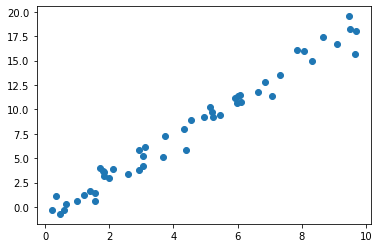

In [3]:
# generating Data

rng = np.random.RandomState(42)
x = 10* rng.rand(50)
y = 2 * x - 1 +rng.randn(50)
plt.scatter(x,y)

In [5]:
# 1. import model
from sklearn.linear_model import LinearRegression

# 2. Choose hyperparameter
model = LinearRegression(fit_intercept=True)

#3. Arrange data into feature and target matric
X = x[:,np.newaxis] # we need our feature metric in shape [n_samples,n_features]
X.shape

(50, 1)

In [6]:
# 4 fit model
model.fit(X,y)

LinearRegression()

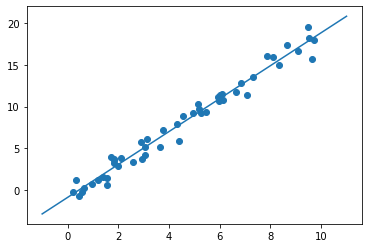

In [7]:
# predict values
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);


### Classification

In [13]:
# loading iris data
iris = sns.load_dataset('iris')
X_iris = iris.drop('species',axis=1)
y_iris = iris['species']

In [12]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [14]:
# spliting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

from sklearn.naive_bayes import GaussianNB #1. Choose model
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain,ytrain) # 3. fit model
y_model = model.predict(Xtest) # 4. predict on new data

In [15]:
# checking accuracy

from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

## Unsupervised learning
### Dimensionality reduction

In [16]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3.Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions


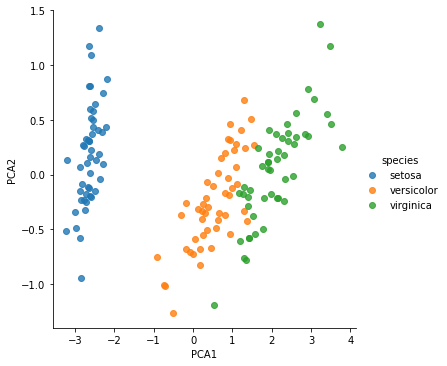

In [19]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

sns.lmplot(x = "PCA1",y = "PCA2",hue='species',data=iris,fit_reg=False)

### Clustering

In [21]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

In [22]:
iris['cluster'] = y_gmm
iris.head()

sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  cluster  
0  0.319397        0  
1 -0.177001        0  
2 -0.144949        0  
3 -0.318299        0  
4  0.326755        0

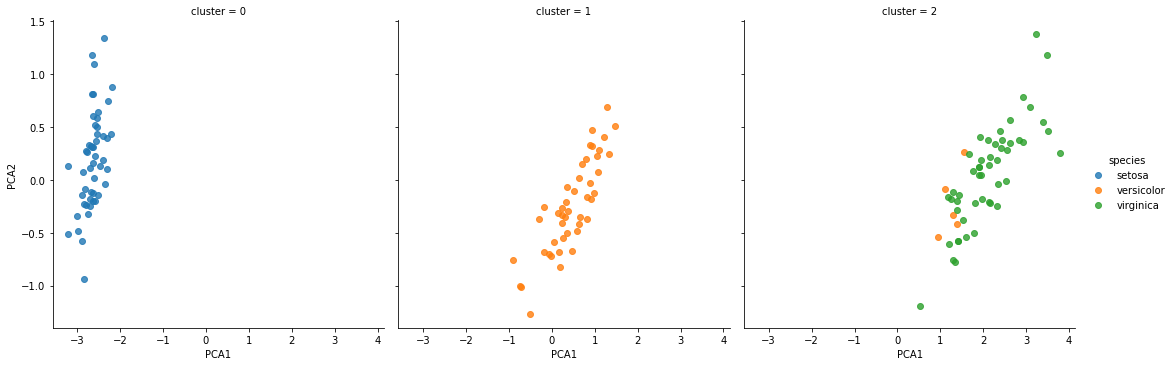

In [24]:
sns.lmplot(x="PCA1",y="PCA2",data=iris,hue='species',col='cluster',fit_reg=False)

# Application: Exploring Handwritten Digits
### Loading and visualizing the digits data


In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape


(1797, 8, 8)

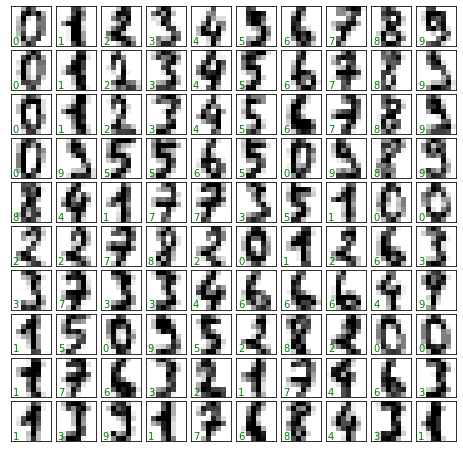

In [26]:
fig, axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')


In [27]:
X = digits.data
X.shape

(1797, 64)

In [28]:
y = digits.target
y.shape

(1797,)

#### Unsupervised learning: Dimensionality reduction


In [30]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)

data_projeted = iso.transform(digits.data)
data_projeted.shape

(1797, 2)

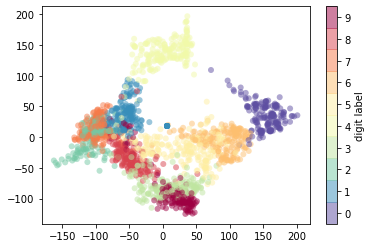

In [35]:
plt.scatter(data_projeted[:,0],data_projeted[:,1],c=digits.target,edgecolors='none',alpha=0.5,
           cmap = plt.cm.get_cmap('Spectral_r',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)

### classification on digits

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [37]:
accuracy_score(ytest,y_model)

0.8333333333333334

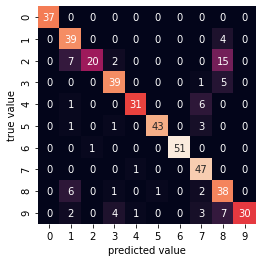

In [38]:
# plotting comfusion metric
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

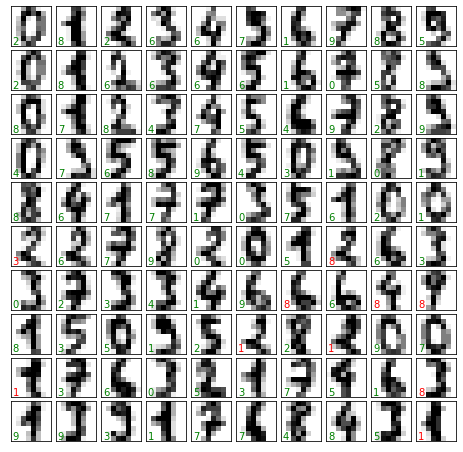

In [40]:
#Another way to gain intuition intothe characteristics of the model is to plot the inputs again, with their predicted labels.

fig, axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')

# Hyperparameters and Model Validation


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


In [5]:
# using cross val

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model, X, y, cv=5)


array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

## Selecting the Best Model
### The bias–variance trade-off
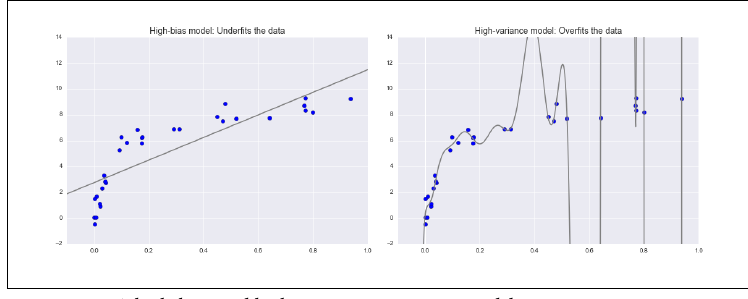
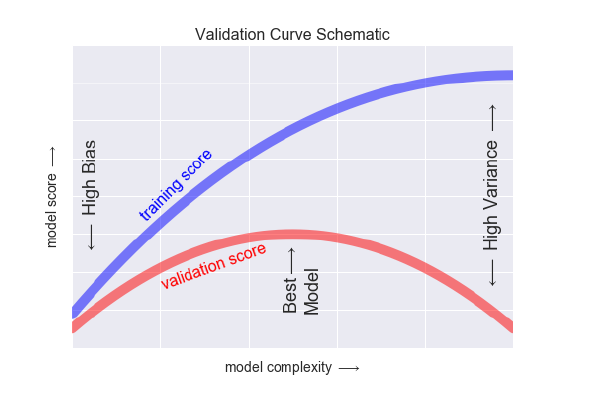

### Validation curves in Scikit-Learn


In [2]:
# using polynonmial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
    LinearRegression(**kwargs))



In [3]:
# create some data

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)


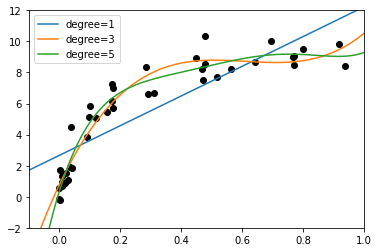

In [22]:
# visualize data

X_test = np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(X.ravel(),y,color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label=f'degree={degree}')
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


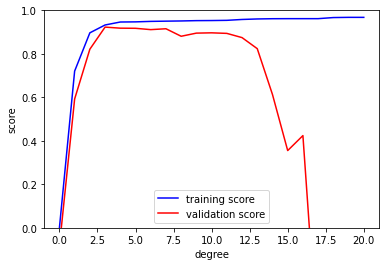

In [6]:
# using validation curve

from sklearn.model_selection import validation_curve
degree = np.arange(0,21)

train_score, val_score = validation_curve(PolynomialRegression(),X,y,'polynomialfeatures__degree',degree,cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');


From the validation curve, we can read off that the optimal trade-off between bias
and variance is found for a third-order polynomial

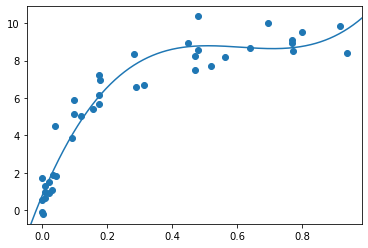

In [14]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);


# Learning Curve

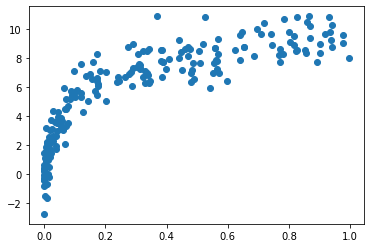

In [4]:
# genrating data
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);


/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(0.0, 1.0)

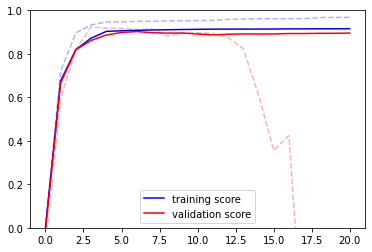

In [9]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)


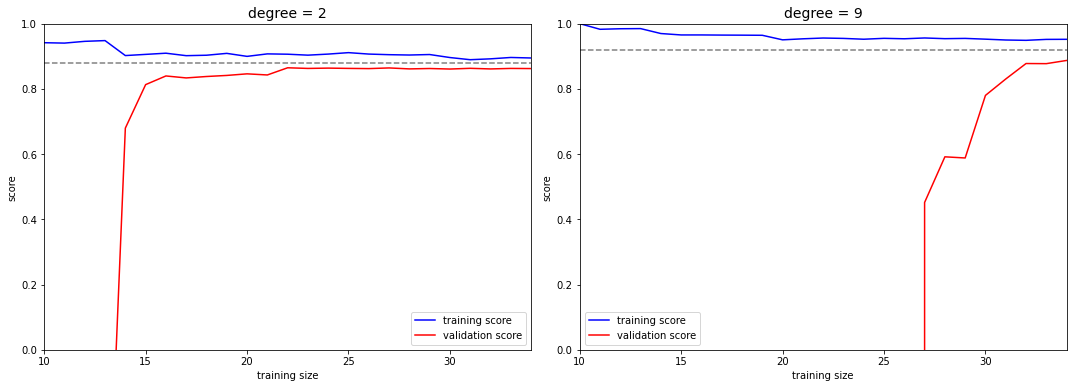

In [15]:
# plotting learning curves

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                            linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')


**NOTE: A learning curve plots the score over varying numbers of training samples, while a validation curve plots the score over a varying hyper parameter. The learning curve is a tool for finding out if an estimator would benefit from more data, or if the model is too simple (biased)**

# Validation in Practice: Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True,False],
             'linearregression__normalize':[True,False]}
grid = GridSearchCV(PolynomialRegression(),param_grid,cv=7)

In [18]:
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [19]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [20]:
model = grid.best_estimator_

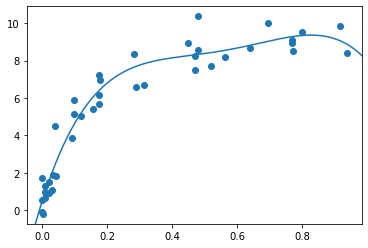

In [24]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test);
plt.axis(lim);

# Feature Engineering
## Categorical Features

In [25]:
data = [
{'price': 850000, 'rooms':4,'neighborhood':'Queen Anne'},
{'price':700000,'rooms':3,'neighborhood':'Fremont'},
{'price':650000,'rooms':3,'neighborhood':'Wallingford'},
{'price':600000,'rooms':2,'neighborhood':'Fremont'}]


You might be tempted to encode this data with a straightforward numerical mapping:
In[2]: {'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};
It turns out that this is not generally a useful approach in Scikit-Learn: the package’s
models make the fundamental assumption that numerical features reflect algebraic
quantities. Thus such a mapping would imply, for example, that Queen Anne < Fre‐
mont < Wallingford, or even that Wallingford - Queen Anne = Fremont, which (niche
demographic jokes aside) does not make much sense.
In this case, one proven technique is to use one-hot encoding, which effectively creates
extra columns indicating the presence or absence of a category with a value of 1 or 0,
respectively. When your data comes as a list of dictionaries, Scikit-Learn’s DictVector
izer will do this for you:


In [26]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [27]:
# see meaning of each column
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [30]:
vec = DictVectorizer(sparse=True, dtype=int)
d = vec.fit_transform(data)


In [35]:
d.data

array([     1, 850000,      4,      1, 700000,      3,      1, 650000,
            3,      1, 600000,      2])

## Text Features


In [36]:
sample = ['problem of evil',
'evil queen',
'horizon problem']


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X


<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [38]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

There are some issues with this approach, however: the raw word counts lead to fea‐
tures that put too much weight on words that appear very frequently, and this can be
suboptimal in some classification algorithms. One approach to fix this is known as
term frequency–inverse document frequency (TF–IDF), which weights the word counts
by a measure of how often they appear in the documents.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

## Derived Feature

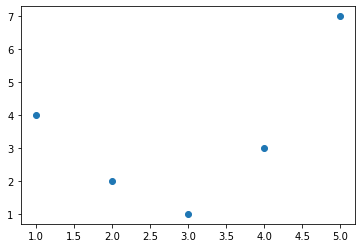

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);


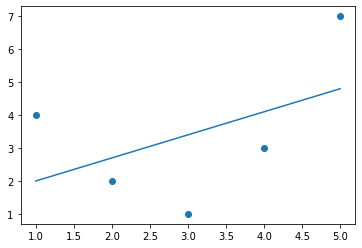

In [41]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);


In [42]:
# above we can see model is not fitting properly, but we can improve this model by changing 
# its data i.e. by deriving some more data using given data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)


[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


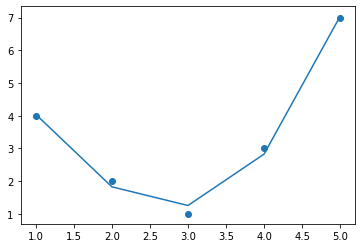

In [43]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);


## Imputation of Missing Data


In [45]:
from numpy import nan
X = np.array([[nan,0,3],
             [3,7,9],
             [3,5,2],
             [4,nan,6],
             [8,8,1]])
y = np.array([14,16,-1,8,-5])

In [49]:
# applying imputer for filling nan values

from sklearn.impute import SimpleImputer
imp = SimpleImputer()
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

## Feature Pipelines


In [51]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())


In [52]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))


[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


# Gaussian Naive Bayes

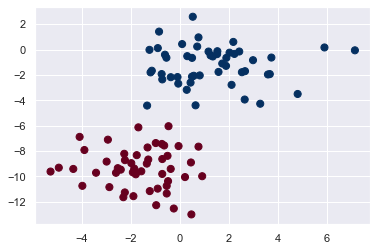

In [55]:
# genrating data

from sklearn.datasets import make_blobs

X,y = make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);


In [57]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)


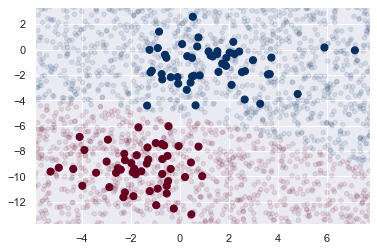

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);


## Multinomial Naive Bayes
The multinomial distribution describes the
probability of observing counts among a number of categories, and thus multinomial
naive Bayes is most appropriate for features that represent counts or count rates.


In [59]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [60]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [61]:
print(train.data[5])


From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [63]:
# making pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [64]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)


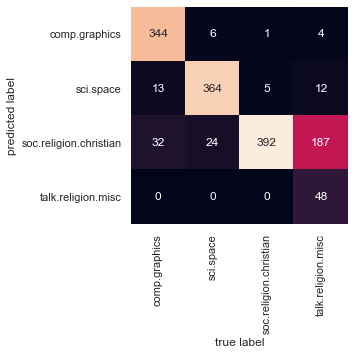

In [65]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


# Linear Regression
## Simple Linear Regression

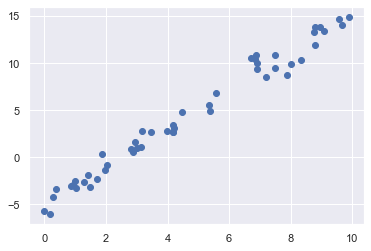

In [2]:
# data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);


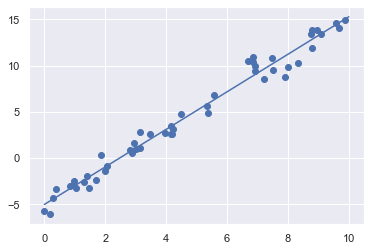

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);


## Basis Function Regression
### Polynomial basis functions


In [5]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])


array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [6]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
LinearRegression())


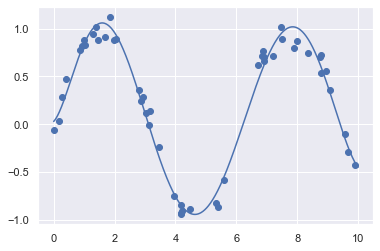

In [10]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit);

# In-Depth: Support Vector Machines

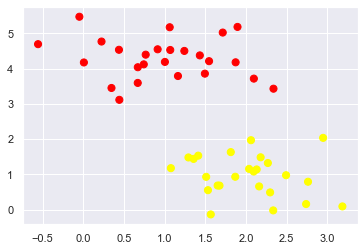

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


In [18]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [20]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [32]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack([a.ravel(), b.ravel()]).T

array([[1, 2],
       [2, 3],
       [3, 4]])

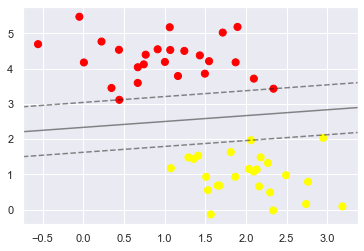

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [22]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier’s success is that for the fit, only the position of the support vec‐
tors matters; any points further from the margin that are on the correct side do not
modify the fit! Technically, this is because these points do not contribute to the loss
function used to fit the model, so their position and number do not matter so long as
they do not cross the margin.


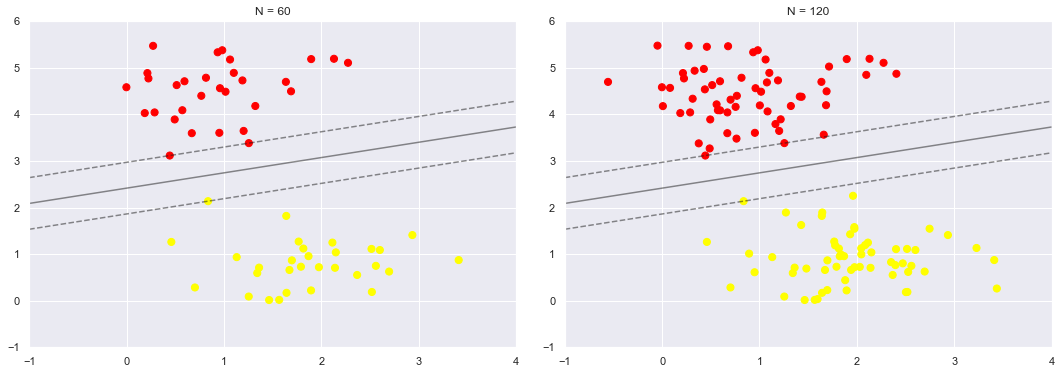

In [23]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


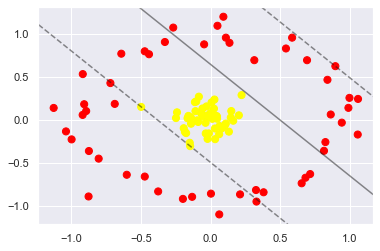

In [24]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


In [25]:
# we cannot seperate such data, so we will introduce another dimension to it
r = np.exp(-(X ** 2).sum(1))


In [29]:
from mpl_toolkits import mplot3d
from ipywidgets import interact,fixed
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),X=fixed(X), y=fixed(y));


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [30]:
# increasing dimension may lead to more computation, therefore SVm has inbuilt kernel option
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)


SVC(C=1000000.0)

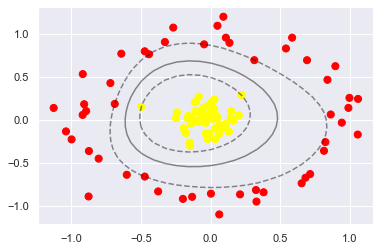

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');


### Tuning the SVM: Softening margins
Our discussion so far has centered on very clean datasets, in which a perfect decision
boundary exists. But what if your data has some amount of overlap? For example, you
may have data like this

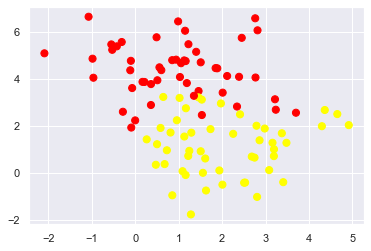

In [33]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


To handle this case, the SVM implementation has a bit of a fudge-factor that “softens”
the margin; that is, it allows some of the points to creep into the margin if that allows
a better fit. The hardness of the margin is controlled by a tuning parameter, most
often known as C. For very large C, the margin is hard, and points cannot lie in it. For
smaller C, the margin is softer, and can grow to encompass some points.


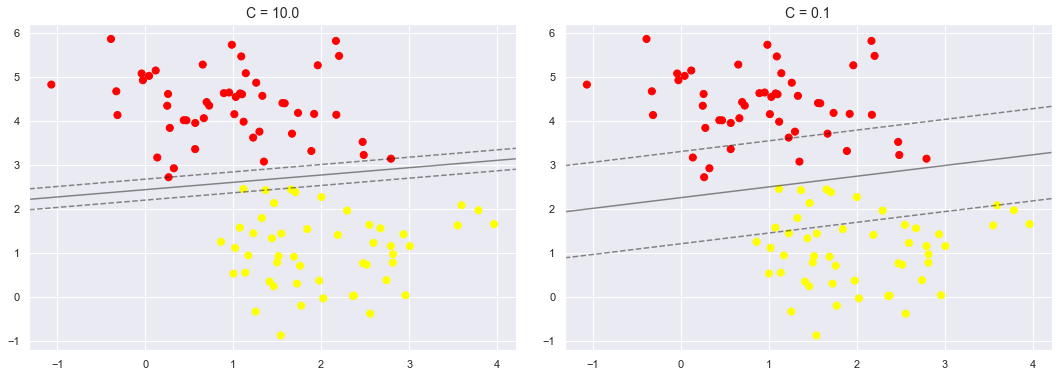

In [34]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)


## Example: Face Recognition


In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


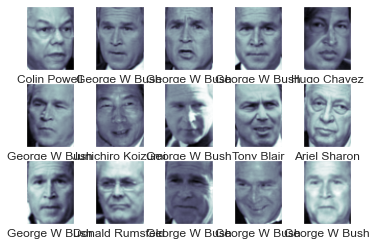

In [37]:
fig,ax = plt.subplots(3,5)
for i ,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [42]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42) # applying dimension reduction
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [44]:
# splitting dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)


In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


CPU times: user 2min 15s, sys: 1.7 s, total: 2min 16s
Wall time: 23 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [48]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


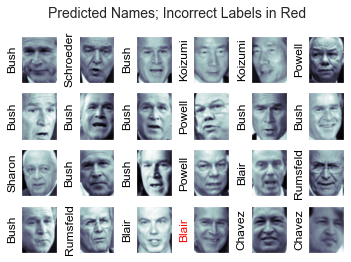

In [49]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
        color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



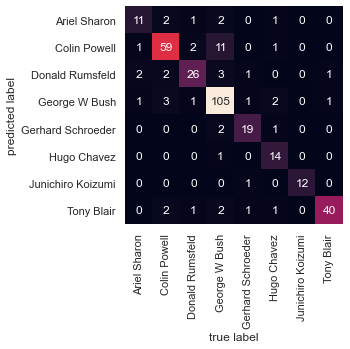

In [51]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


# In Depth: Decision Tree

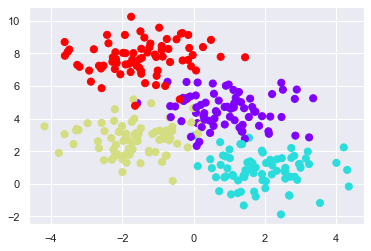

In [2]:
# making dataset
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)


In [6]:
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax = ax or plt.gca()
    
    #plot the training points
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #fit the model
    model.fit(X,y)
    
    xx,yy = np.meshgrid(np.linspace(*xlim,num=200),np.linspace(*ylim,num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    
    #create a color plot with the results
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes + 1)-0.5,cmap=cmap,
                          clim=(y.min(),y.max()),zorder=1)
    
    ax.set(xlim=xlim,ylim=ylim)
    
    

<ipython-input-6-41275213f7e5>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes + 1)-0.5,cmap=cmap,


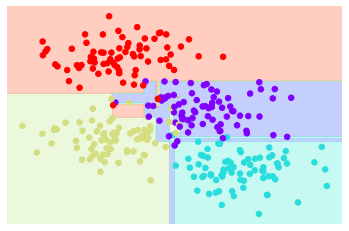

In [7]:
visualize_classifier(DecisionTreeClassifier(),X,y)

# Random Forest

<ipython-input-6-41275213f7e5>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes + 1)-0.5,cmap=cmap,


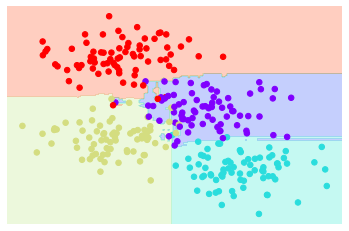

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);


# Random Forest Regressor

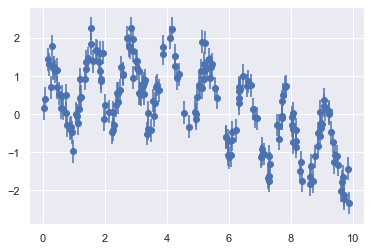

In [9]:
# data
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


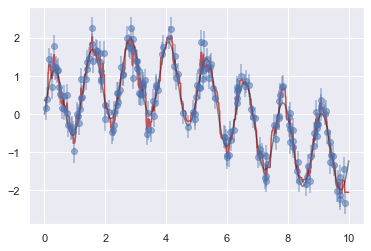

In [10]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);


## Example: Random Forest for classifying digits

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

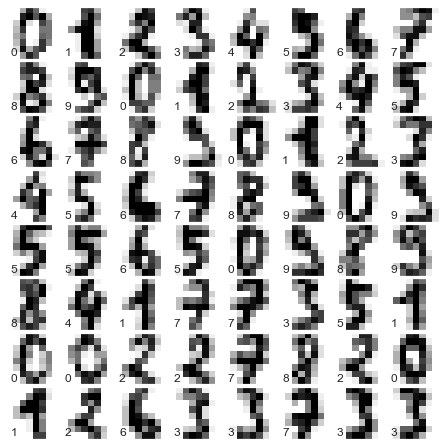

In [12]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)


In [15]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.98      0.99        49
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



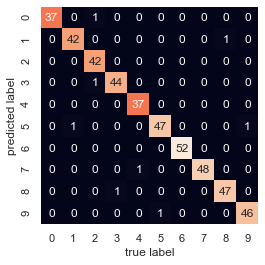

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


# In Depth: Principal Component Analysis


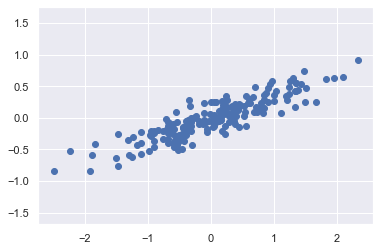

In [17]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [19]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [20]:
pca.explained_variance_

array([0.7625315, 0.0184779])

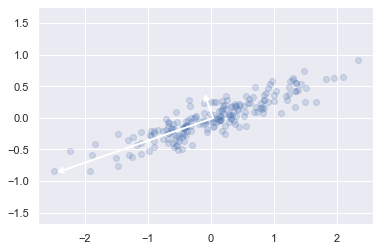

In [22]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
    linewidth=2,
    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


### PCA as dimensionality reduction


In [23]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:", X.shape)
print("transformed shape:", X_pca.shape)


original shape: (200, 2)
transformed shape: (200, 1)


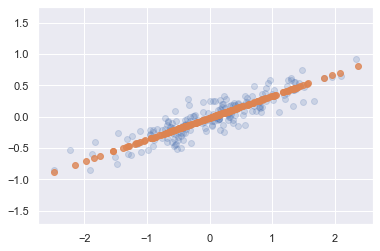

In [24]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');


### PCA for visualization: Handwritten digits


In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

In [26]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)


(1797, 64)
(1797, 2)


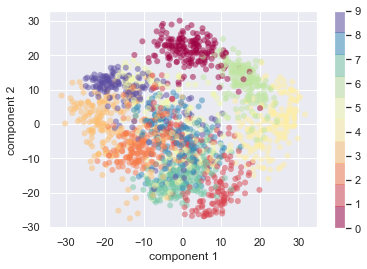

In [29]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


### Choosing the number of components


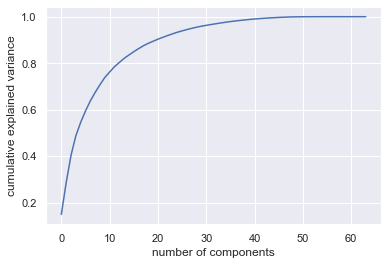

In [30]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


This curve quantifies how much of the total, 64-dimensional variance is contained
within the first N components. For example, we see that with the digits the first 10
components contain approximately 75% of the variance, while you need around 50
components to describe close to 100% of the variance.
Here we see that our two-dimensional projection loses a lot of information (as meas‐
ured by the explained variance) and that we’d need about 20 components to retain
90% of the variance. Looking at this plot for a high-dimensional dataset can help you
understand the level of redundancy present in multiple observations.


## PCA as Noise Filtering


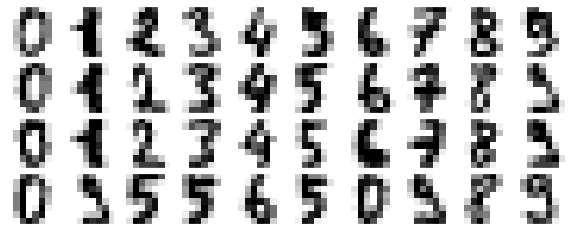

In [45]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
plot_digits(digits.data)


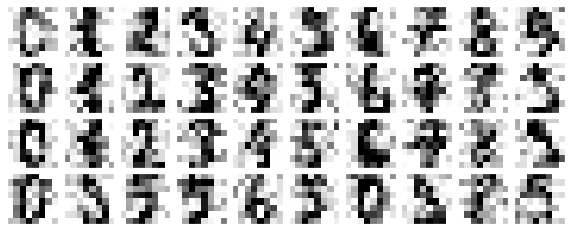

In [46]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


In [47]:
# Let’s train aPCA on the noisy data, requesting that the projection 
#preserve 50% of the variance:

pca = PCA(0.50).fit(noisy)
pca.n_components_


12

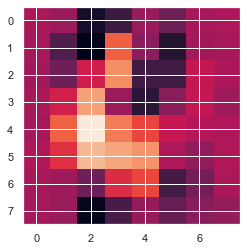

In [53]:
plt.imshow(pca.components_[0].reshape((8,8)))

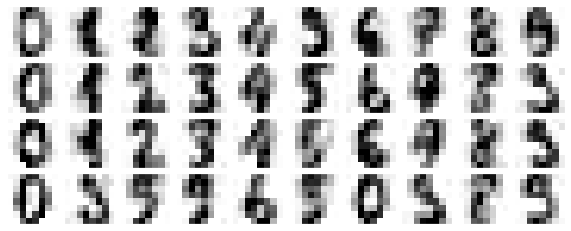

In [35]:
# Now we compute these components, and then use the inverse of the transform 
#to reconstruct the filtered digits
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)


## Example: Eigenfaces


In [55]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [56]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)


PCA(n_components=150)

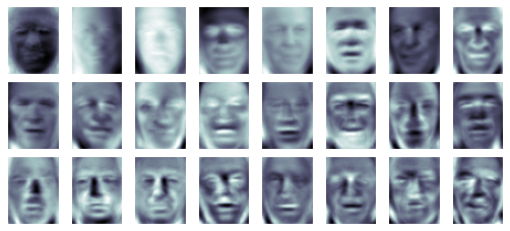

In [57]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                    subplot_kw={'xticks':[], 'yticks':[]},
                    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


In [58]:
pca.components_[0].shape

(2914,)

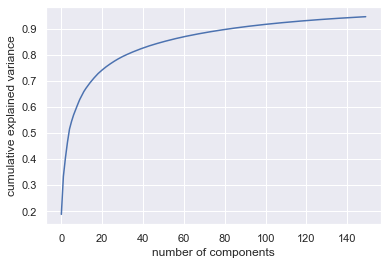

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [61]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)


Text(0, 0.5, 'full-dim\ninput')

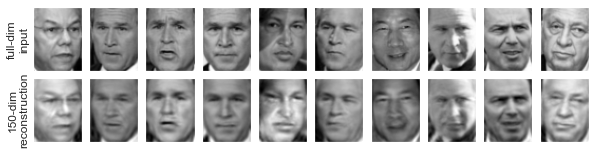

In [65]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[1,0].set_ylabel('150-dim\nreconstruction')
ax[0,0].set_ylabel('full-dim\ninput')

# K-means Clustering

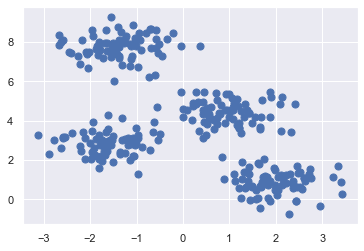

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


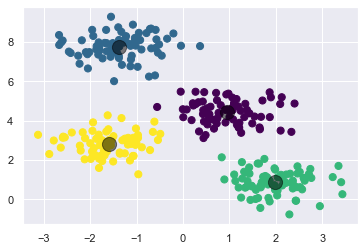

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


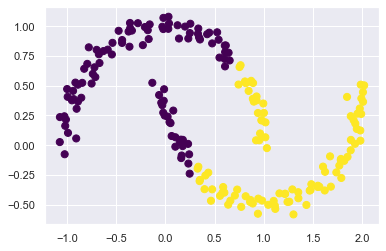

In [9]:
# genrating moon data
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');


/home/mustafa/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


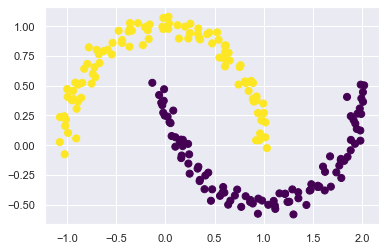

In [10]:
# K-means with kernels
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')

labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

## Examples

### Example 1: k-Means on digits

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape


(10, 64)

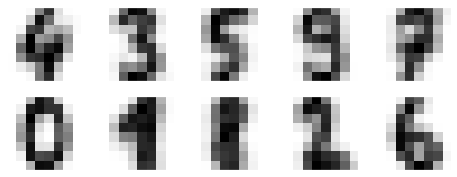

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


In [19]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]


In [23]:
mode(digits.target[clusters == 0])[0]

array([4])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7935447968836951

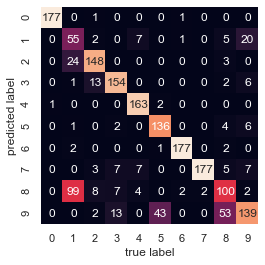

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [26]:
# using manifold leqarning

from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)


0.9443516972732332

### Example 2: k-means for color compression


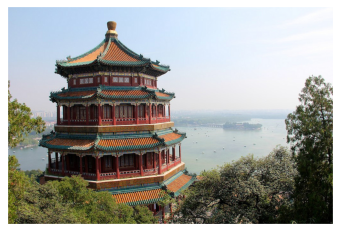

In [27]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);


In [28]:
china.shape

(427, 640, 3)

In [29]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape


(273280, 3)

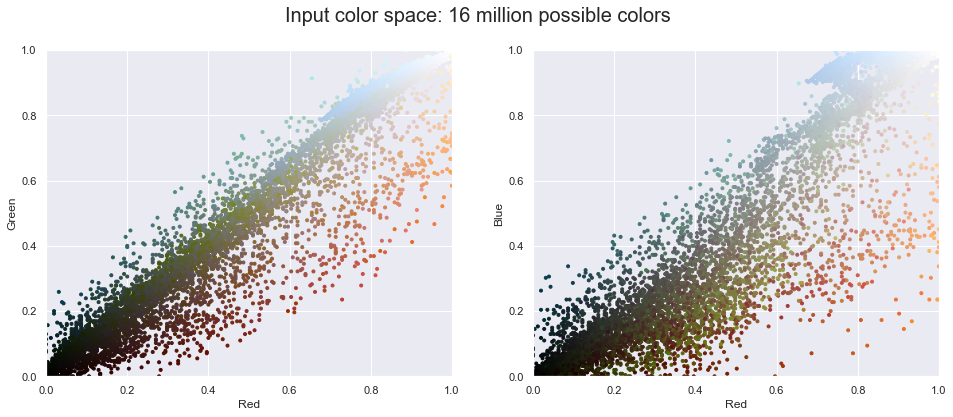

In [30]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')


In [32]:
data[0].T

array([0.68235294, 0.78823529, 0.90588235])

In [33]:
rng = np.random.RandomState(0)
i = rng.permutation(data.shape[0])[:10000]


In [36]:
data[i].T

array([[0.92156863, 0.37647059, 0.48235294, ..., 0.97647059, 0.62352941,
        0.86666667],
       [0.9254902 , 0.37647059, 0.42745098, ..., 0.98039216, 0.78039216,
        0.93333333],
       [0.94509804, 0.14117647, 0.41568627, ..., 0.99607843, 0.7372549 ,
        0.99607843]])

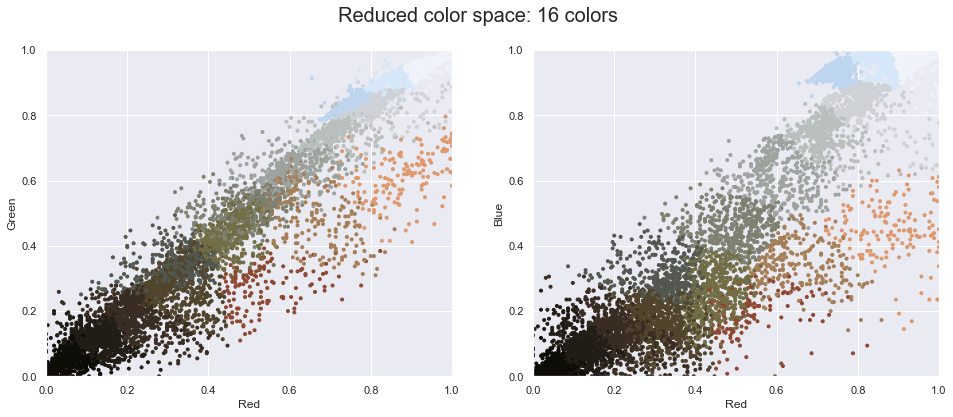

In [37]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
title="Reduced color space: 16 colors")


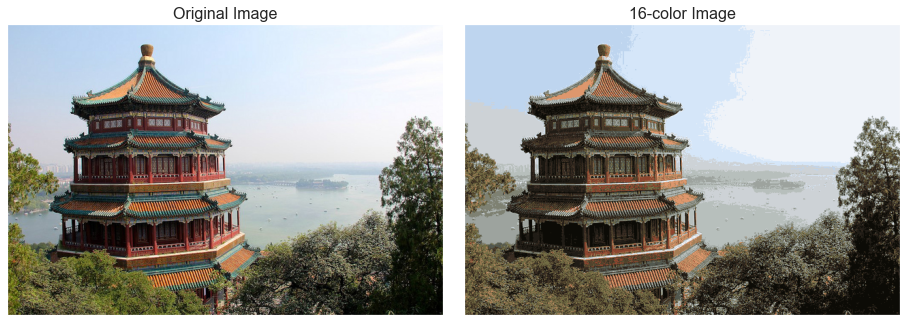

In [38]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);


# Gaussian Mixture Models (GMM)

In [42]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting


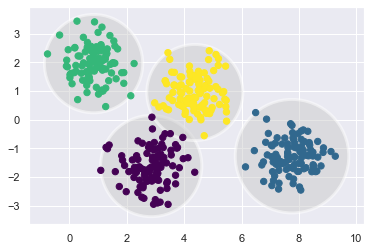

In [43]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)


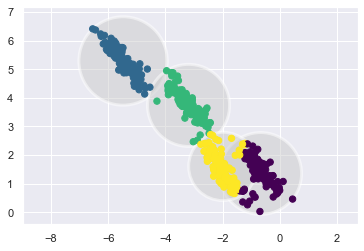

In [44]:
# streched data using kmeans
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)


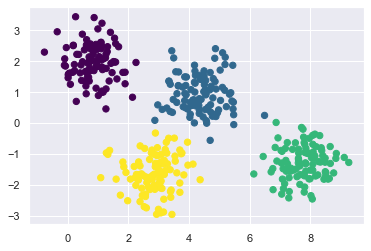

In [47]:
# GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


In [57]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


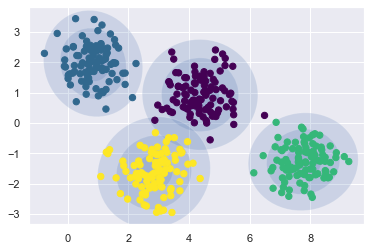

In [58]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)


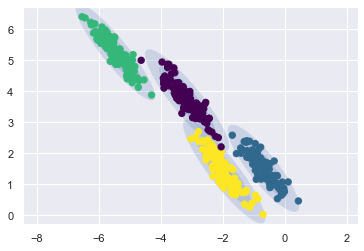

In [60]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)


## Example: GMM for Generating New Data


In [61]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

In [62]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
    subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
    plot_digits(digits.data)


In [63]:
# Here we will use a straightforward PCA, asking it to preserve 99% of the
# variance in the projected data:

from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape


(1797, 41)

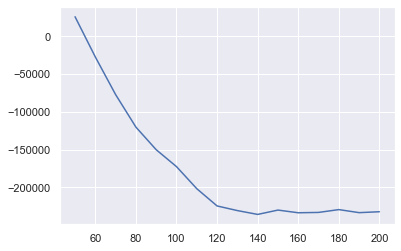

In [65]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);


In [67]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)


True


In [70]:
data_new = gmm.sample(100)
data_new


(array([[-0.25299384,  0.00275422,  0.25884152, ..., -0.86676161,
          0.98501098, -0.20262423],
        [ 0.20109912, -1.03739354, -1.56002573, ..., -0.55600358,
          0.07005042,  0.52699513],
        [ 0.32759011,  1.71533962, -0.43370126, ...,  0.28666891,
          0.24969919,  1.7299895 ],
        ...,
        [ 0.34314904, -0.97104837, -1.03513163, ..., -0.83142544,
         -0.29927735,  0.41840733],
        [-0.51697926, -0.87042745,  0.97239068, ..., -1.17231095,
          1.7825095 , -0.91769196],
        [-0.08181446, -0.45220329,  0.57176267, ..., -0.0023243 ,
          0.26038511,  1.05597769]]),
 array([  0,   1,   2,   2,   3,   4,   5,   5,   6,   7,   7,   8,   8,
          8,   8,   9,  10,  10,  11,  13,  13,  17,  17,  17,  18,  18,
         19,  20,  20,  20,  21,  22,  23,  25,  27,  27,  28,  31,  32,
         35,  37,  38,  38,  38,  39,  40,  42,  44,  45,  49,  50,  52,
         52,  52,  56,  58,  65,  66,  66,  68,  68,  68,  70,  70,  70,
        

In [ ]:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)


<ipython-input-62-97a2a31565fa>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(10, 10, figsize=(8, 8),


# In-Depth: Manifold Learning
## Manifold Learning: “HELLO”


In [5]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


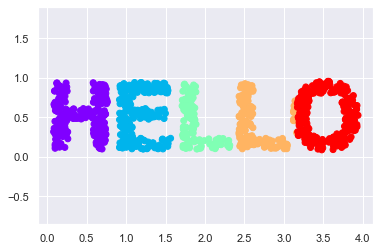

In [6]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');


## Multidimensional Scaling

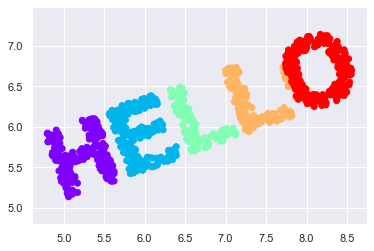

In [7]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');


In [8]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape


(1000, 3)

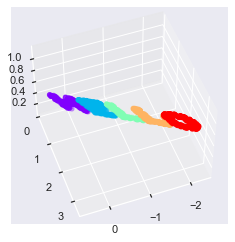

In [11]:
from mpl_toolkits import mplot3d
from sklearn.manifold import MDS
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
**colorize)
ax.view_init(azim=70, elev=50)


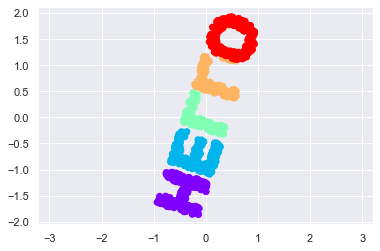

In [12]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');


## Nonlinear Manifolds: Locally Linear Embedding


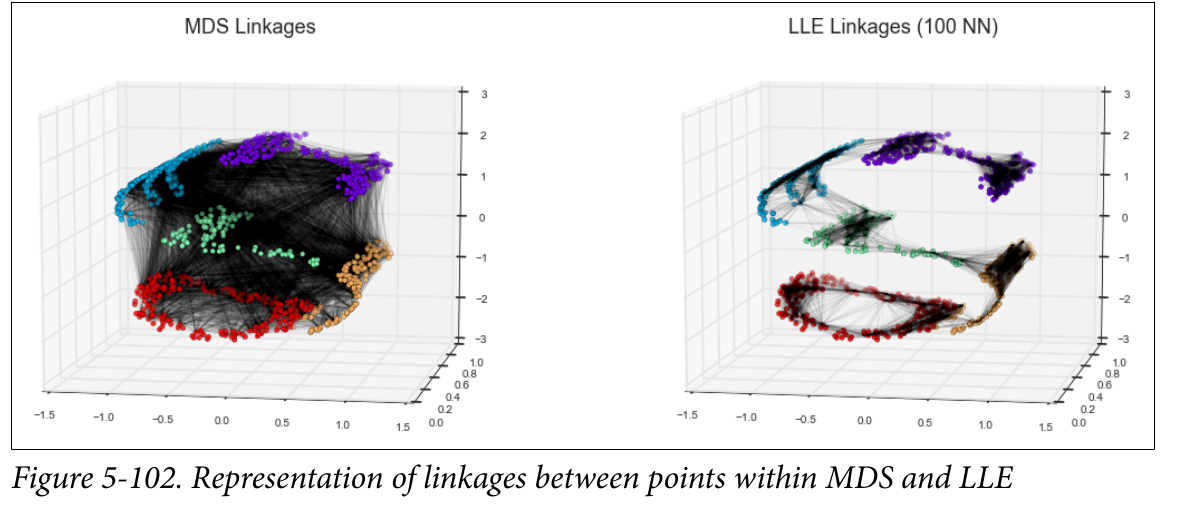
Here each faint line represents a distance that should be preserved in the embedding.
On the left is a representation of the model used by MDS: it tries to preserve the dis‐
tances between each pair of points in the dataset. On the right is a representation of
the model used by a manifold learning algorithm called locally linear embedding
(LLE): rather than preserving all distances, it instead tries to preserve only the distan‐
ces between neighboring points: in this case, the nearest 100 neighbors of each point.
Thinking about the left panel, we can see why MDS fails: there is no way to flatten
this data while adequately preserving the length of every line drawn between the two
points. For the right panel, on the other hand, things look a bit more optimistic. We
could imagine unrolling the data in a way that keeps the lengths of the lines approxi‐
mately the same. This is precisely what LLE does, through a global optimization of a
cost function reflecting this logic.
LLE comes in a number of flavors; here we will use the modified LLE algorithm to
recover the embedded two-dimensional manifold. In general, modified LLE does bet‐
ter than other flavors of the algorithm at recovering well-defined manifolds with very
little distortion

In [14]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)


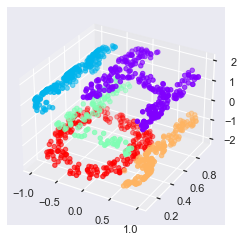

In [15]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
**colorize);


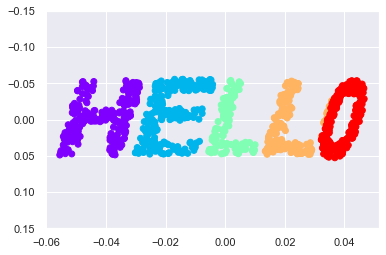

In [16]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);


## Example: Isomap on Faces


In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape


(2370, 2914)

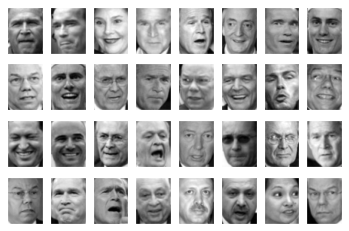

In [18]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')


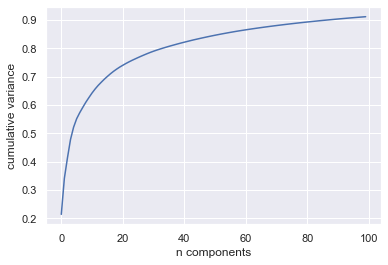

In [20]:
from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');


In [21]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape


(2370, 2)

In [22]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
            # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap=cmap),
            proj[i])
            ax.add_artist(imagebox)



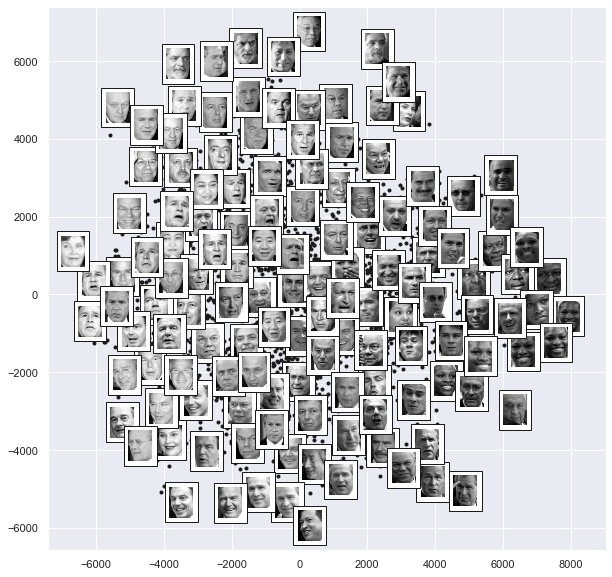

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,model=Isomap(n_components=2),images=faces.images[:, ::2, ::2])
